## 2. Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#let's read the data in from online
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(heart_disease) <- c("age", "sex", "chest_pain", "trest_bps", "chol", "fbs", "resting_ecg", 
                             "max_hr", "exer_agina", "depr_excer_vs_rest", "exercise_segment_slope", 
                             "num_major_vessels", "heart_condition", "heart_disease_diagnosis")


heart_disease

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,depr_excer_vs_rest,exercise_segment_slope,num_major_vessels,heart_condition,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [3]:
# Let's clean up the table by giving the categorical names to the values 
# of the variables which should be factors

# made vectors categorical and numerical 
heart_disease <- heart_disease |>
                mutate(sex = as.factor(sex)) |>
                mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"))

heart_disease <- heart_disease |>
                mutate(chest_pain = as.factor(chest_pain)) |>
                mutate(chest_pain = fct_recode(chest_pain, 
                                               "typical angina" = "1", "atypical angina" = "2",
                                              "non-aginal pain" = "3", "asymptomatic" = "4"))
heart_disease |> distinct(heart_condition)

heart_condition
<chr>
3.0
7.0
6.0
?


In [4]:
heart_disease <- heart_disease |>
                mutate(heart_condition = as.factor(heart_condition)) |>
                mutate(heart_condition = fct_recode(heart_condition, 
                                               "normal" = "3.0", "fixed defect" = "6.0",
                                              "reversible defect" = "7.0"))
heart_disease <- heart_disease |>
                mutate(exercise_segment_slope = as.factor(exercise_segment_slope)) |>
                mutate(exercise_segment_slope = fct_recode(exercise_segment_slope, 
                                               "unsloping" = "1", "flat" = "2",
                                              "reversible defect" = "3"))
heart_disease <- heart_disease |>
                mutate(heart_disease_diagnosis = as.factor(heart_disease_diagnosis)) |>
                mutate(heart_disease_diagnosis = fct_recode(heart_disease_diagnosis, 
                                               "no disease" = "0", "possible" = "1",
                                              "likely" = "2", "certain" = "3", "severe" = "4"))

heart_disease <- heart_disease |>
                mutate(heart_disease_diagnosis = as.factor(heart_disease_diagnosis))

heart_disease

age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,depr_excer_vs_rest,exercise_segment_slope,num_major_vessels,heart_condition,heart_disease_diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>
67,male,asymptomatic,160,286,0,2,108,1,1.5,flat,3.0,normal,likely
67,male,asymptomatic,120,229,0,2,129,1,2.6,flat,2.0,reversible defect,possible
37,male,non-aginal pain,130,250,0,0,187,0,3.5,reversible defect,0.0,normal,no disease
41,female,atypical angina,130,204,0,2,172,0,1.4,unsloping,0.0,normal,no disease
56,male,atypical angina,120,236,0,0,178,0,0.8,unsloping,0.0,normal,no disease
62,female,asymptomatic,140,268,0,2,160,0,3.6,reversible defect,2.0,normal,certain
57,female,asymptomatic,120,354,0,0,163,1,0.6,unsloping,0.0,normal,no disease
63,male,asymptomatic,130,254,0,2,147,0,1.4,flat,1.0,reversible defect,likely
53,male,asymptomatic,140,203,1,2,155,1,3.1,reversible defect,0.0,reversible defect,possible


In [5]:
# we do not need all of these variables, so let's take the ones that seem most useful
heart_disease_train <- heart_disease |>
            select(age, chest_pain, trest_bps, chol, max_hr, depr_excer_vs_rest, heart_condition, heart_disease_diagnosis)

glimpse(heart_disease_train)

Rows: 302
Columns: 8
$ age                     <dbl> 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56…
$ chest_pain              <fct> asymptomatic, asymptomatic, non-aginal pain, a…
$ trest_bps               <dbl> 160, 120, 130, 130, 120, 140, 120, 130, 140, 1…
$ chol                    <dbl> 286, 229, 250, 204, 236, 268, 354, 254, 203, 1…
$ max_hr                  <dbl> 108, 129, 187, 172, 178, 160, 163, 147, 155, 1…
$ depr_excer_vs_rest      <dbl> 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0…
$ heart_condition         <fct> normal, reversible defect, normal, normal, nor…
$ heart_disease_diagnosis <fct> likely, possible, no disease, no disease, no d…


In [6]:
#Let's see if there are any N/A values for the variables we might want to predict
#these variables could be heart_condition or heart_disease_diagnosis


##########
heart_condition_na <- filter(heart_disease_train, heart_condition ==  "?")
heart_condition_na


heart_disease_na <- filter(heart_disease_train, heart_disease_diagnosis ==  "?")
heart_disease_na

age,chest_pain,trest_bps,chol,max_hr,depr_excer_vs_rest,heart_condition,heart_disease_diagnosis
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
53,non-aginal pain,128,216,115,0,?,no disease
52,asymptomatic,128,204,156,1,?,likely


age,chest_pain,trest_bps,chol,max_hr,depr_excer_vs_rest,heart_condition,heart_disease_diagnosis
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>


We can see that for the two potential response variables, heart_condition and heart_disease_diagnosis, that only a total of 2 rows have N/A values marked by "?".
For the purposes of this proposal data analysis, we will remove these two rows as they are negligible in a dataset of 300 more observations.

In [7]:
heart_disease_train <- heart_disease_train |>
            filter(heart_condition != "?")

glimpse(heart_disease_train)

Rows: 300
Columns: 8
$ age                     <dbl> 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56…
$ chest_pain              <fct> asymptomatic, asymptomatic, non-aginal pain, a…
$ trest_bps               <dbl> 160, 120, 130, 130, 120, 140, 120, 130, 140, 1…
$ chol                    <dbl> 286, 229, 250, 204, 236, 268, 354, 254, 203, 1…
$ max_hr                  <dbl> 108, 129, 187, 172, 178, 160, 163, 147, 155, 1…
$ depr_excer_vs_rest      <dbl> 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0…
$ heart_condition         <fct> normal, reversible defect, normal, normal, nor…
$ heart_disease_diagnosis <fct> likely, possible, no disease, no disease, no d…


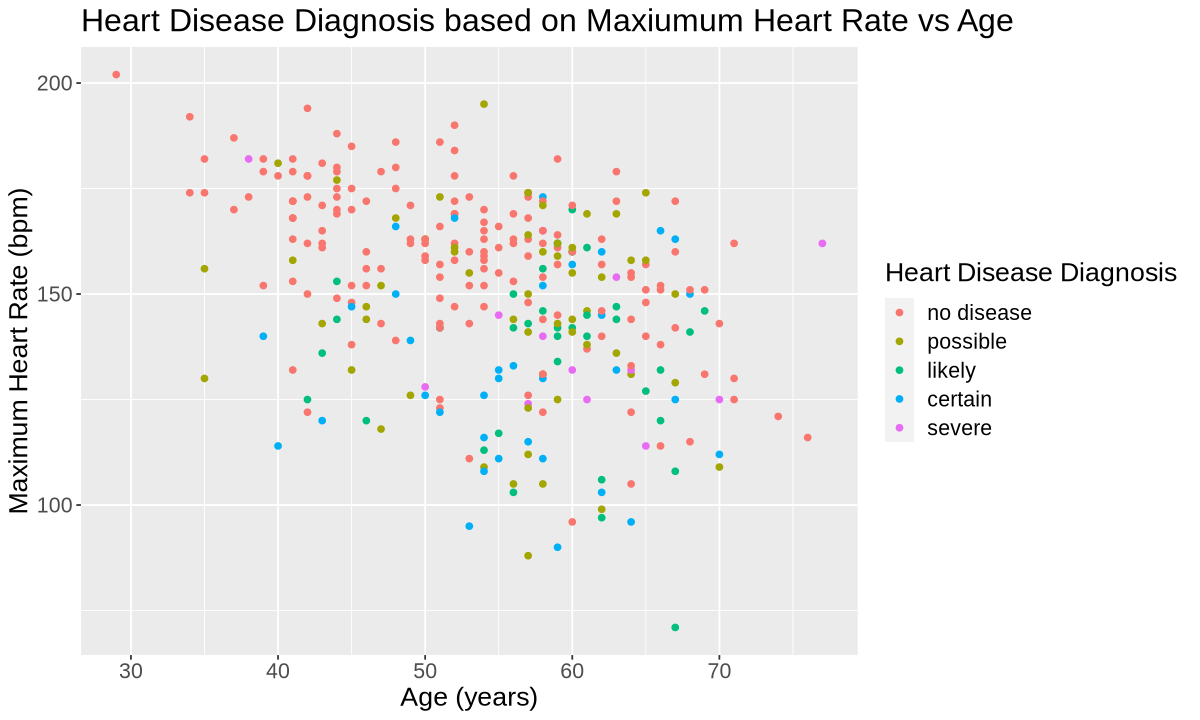

In [8]:
#Now it is time for visualization! 
#Let's see a few different plots to see what the relationships within the data are.

options(repr.plot.width = 10, repr.plot.height = 6)
age_vs_max_hr <- heart_disease_train |>
            ggplot(aes(x = age, y = max_hr, color = heart_disease_diagnosis)) +
            geom_point() +
            labs(title = "Heart Disease Diagnosis based on Maxiumum Heart Rate vs Age",
                x = "Age (years)", y = "Maximum Heart Rate (bpm)",
                color = "Heart Disease Diagnosis") +
            theme(text = element_text(size = 16))

age_vs_max_hr

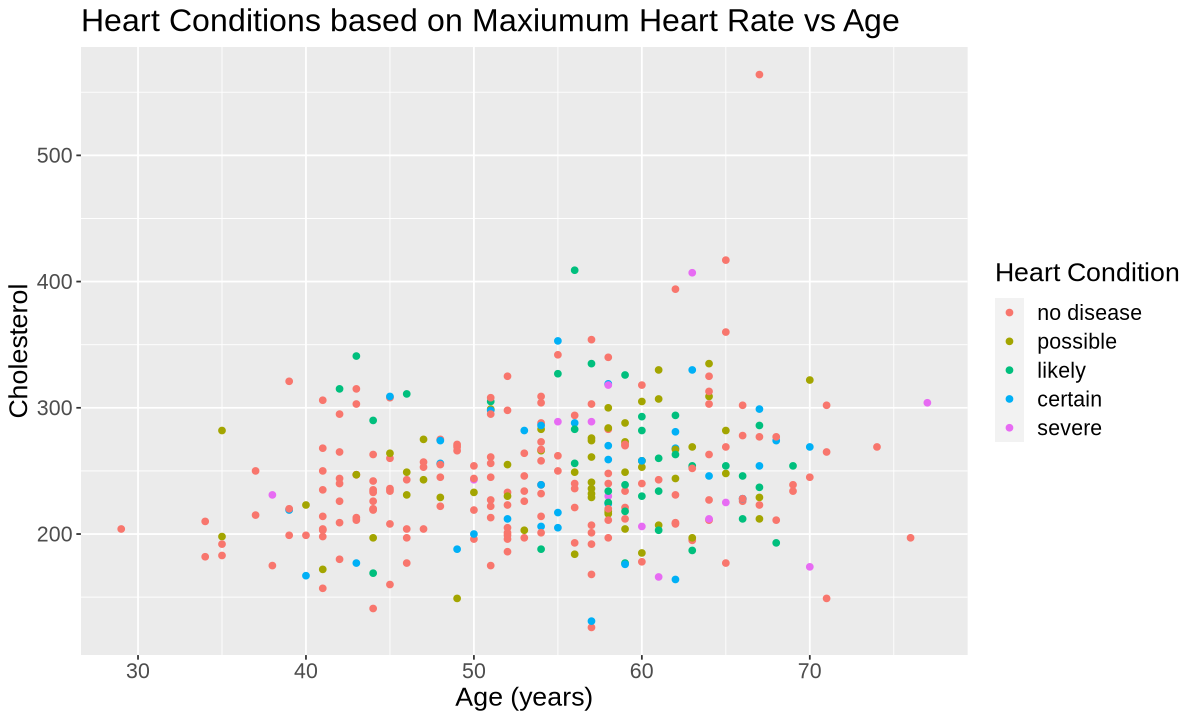

In [14]:
options(repr.plot.width = 10, repr.plot.height = 6)
age_vs_chol <- heart_disease_train |>
            ggplot(aes(x = age, y = chol, color = heart_disease_diagnosis)) +
            geom_point() +
            labs(title = "Heart Conditions based on Maxiumum Heart Rate vs Age",
                x = "Age (years)", y = "Cholesterol",
                color = "Heart Condition") +
            theme(text = element_text(size = 16))
age_vs_chol

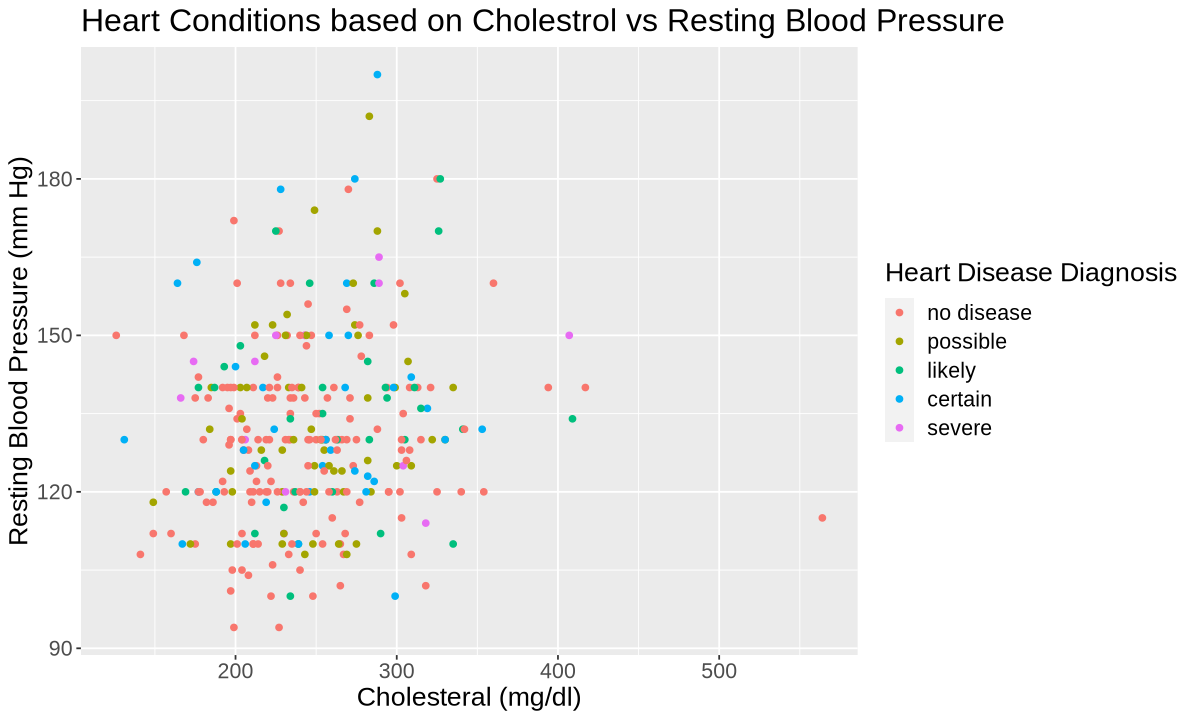

In [15]:
options(repr.plot.width = 10, repr.plot.height = 6)

chol_vs_trest_bps <- heart_disease_train |>
            ggplot(aes(x = chol, y = trest_bps, color = heart_disease_diagnosis)) +
            geom_point() +
            labs(title = "Heart Conditions based on Cholestrol vs Resting Blood Pressure",
                x = "Cholesteral (mg/dl)", y = "Resting Blood Pressure (mm Hg)",
                color = "Heart Disease Diagnosis") +
            theme(text = element_text(size = 16))

chol_vs_trest_bps

From just these few simple plots, we can see that there is some interesting distribution and relationship of values for heart_condition and heart_disease_diagnosis, perhaps we will be able to explore these further at another time with a deeper analysis, in relation to the k-nn classification algorithm.

## 3. Methods

Our final goal is to create a K nearest neighbours (KNN) classification model that predicts the 'heart_disease_diagnosis' using the predictor variable that we choose to be optimal. We will do this through the following steps:
1. Read-in the dataset from the URL
2. Tidy the dataset
3. Split the data into training and testing datasets
4. Analyze the dataset using scatter-plots to determine which variable has the optimal significance. By plotting different variables in the training dataset we can see how different variables vary in range over different 'heart_disease_diagnosis' categories.
5. Find the optimal $k$ valure and build the model.
6. Evaluate the model
7. Present conclusions and takeaways from our model